In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.decomposition import PCA
from astropy.io import fits

In [39]:
fits_file = 'tess2018206045859-s0001-0000000299779198-0120-s_lc.fits'
# fits_files = glob.glob("tess*.fits")

In [40]:
fits.info(fits_file)
fits.getdata(fits_file, ext=1).columns

Filename: tess2018206045859-s0001-0000000299779198-0120-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [41]:
with fits.open(fits_file, mode="readonly") as hdulist:
    time = hdulist[1].data["TIME"]
    sap_flux = hdulist[1].data["SAP_FLUX"]
    pdcsap_flux = hdulist[1].data["PDCSAP_FLUX"]
    quality = hdulist[1].data["QUALITY"]
# print(quality.tolist())

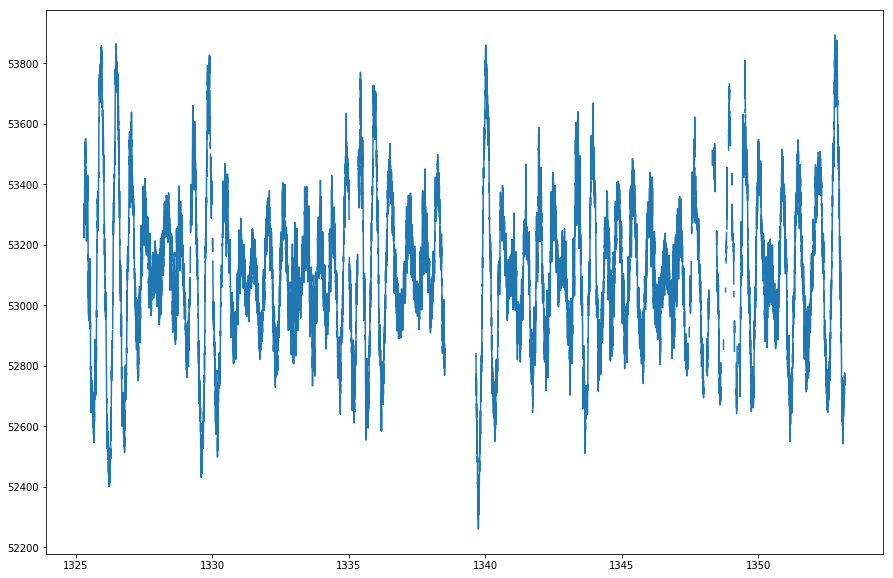

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(time, pdcsap_flux, "-",markersize=2);
plt.xlabel("Time(JD - 2457000) [Day]", fontsize=15)
plt.ylabel("PDCSAP Flux [e-/s]", fontsize=15)
plt.title()

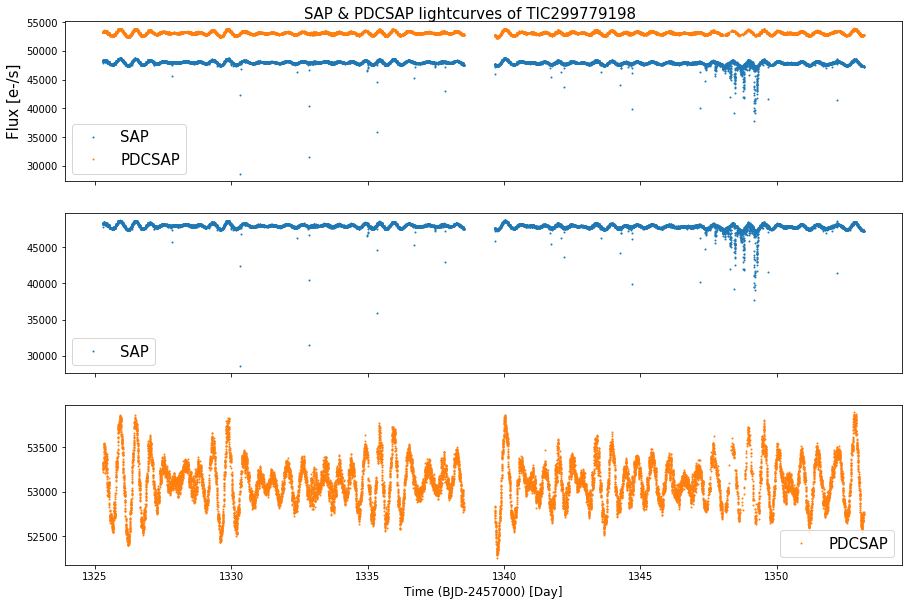

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

axs[0].plot(time, sap_flux, ".", label="SAP", markersize=2)
axs[0].plot(time, pdcsap_flux, ".", label="PDCSAP", markersize=2)
axs[1].plot(time, sap_flux, ".", label="SAP", markersize=2)
axs[2].plot(time, pdcsap_flux, ".", label="PDCSAP", color="C1", markersize=2)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)
axs[2].legend(fontsize=15)

fig.suptitle("SAP & PDCSAP lightcurves of TIC299779198", x=0.5, y=0.9, fontsize=15);
axs[2].set_xlabel("Time (BJD-2457000) [Day]", fontsize=12)
axs[0].set_ylabel("Flux [e-/s]", fontsize=15)
plt.savefig("Lightcurve_TIC299779198.png", dpi=200)

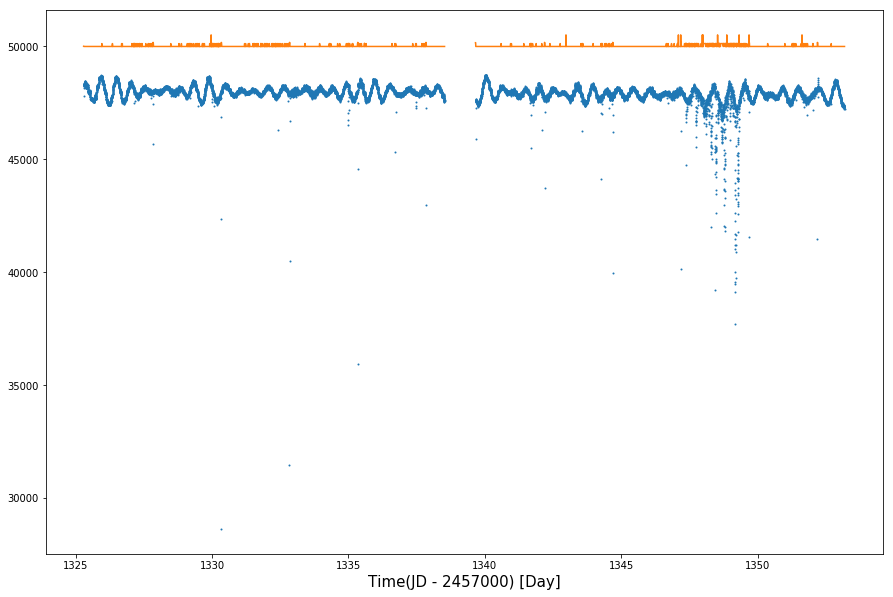

In [52]:
plt.figure(figsize=(15, 10))
plt.plot(time, sap_flux, ".",markersize=2);
plt.xlabel("Time(JD - 2457000) [Day]", fontsize=15)
plt.plot(time, quality + 50000)
# plt.ylabel("PDCSAP Flux [e-/s]", fontsize=15)
# plt.title()

In [30]:
pdcsap_flux.reshape(-1, 1)

array([[      nan],
       [53256.156],
       [53283.465],
       ...,
       [52749.18 ],
       [52746.43 ],
       [52746.25 ]], dtype=float32)

In [34]:
pdcsap_flux

array([      nan, 53256.156, 53283.465, ..., 52749.18 , 52746.43 ,
       52746.25 ], dtype=float32)